<IPython.core.display.Javascript object>


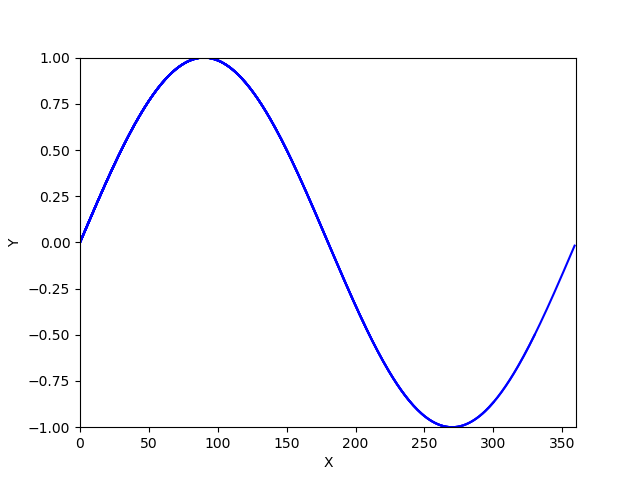

In [1]:
"Dynamic plotting in matplotlib. Copy and paste into a Jupyter notebook."
# written October 2016 by Sam Greydanus
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, y, ax, colors=['b']):
    for color in colors:
        ax.plot(x, y, color)
    fig.canvas.draw()
    
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X') ; ax.set_ylabel('Y')
ax.set_xlim(0,360) ; ax.set_ylim(-1,1)
xs, ys = [], []

# this is any loop for which you want to plot dynamic updates.
# in my case, I'm plotting loss functions for neural nets
for x in range(360):
    y = np.sin(x*np.pi/180)
    xs.append(x)
    ys.append(y)
    if x % 30 == 0:
        plt_dynamic(xs, ys, ax)
        time.sleep(.2)
plt_dynamic(xs, ys, ax)

In [2]:
import random
sour = [0, 0, 0]
pogl = [0, 0, 0]
def distance(ar1, ar2):
    return ((ar1[0] - ar2[0])**2 + (ar1[1] - ar2[1])**2 + (ar1[2] - ar2[2])**2)**0.5
while not(distance(sour, pogl) >= 10 and distance(sour, pogl) <= 20):
    for i in range(0,3):
        pogl[i] = pogl[i] + random.uniform(0, 10)
        
print(pogl)

[8.520154696576684, 6.342677737671684, 2.045351244777315]


In [3]:
distance(sour, pogl)

10.81693388405725

In [4]:
import numpy as np
def first_dir(point):
    new_point = point.copy()
    length = np.random.exponential()
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    z = random.uniform(-1, 1)
    l = distance([x,y,z], [0,0,0])
    new_point[0] += x * (length / l)
    new_point[1] += y * (length / l)
    new_point[2] += z * (length / l)
    return new_point

def calc_omega(point, new_point):
    l = distance(point, new_point)  
    omega = []
    for i in range(3):
        omega.append((new_point[i] - point[i])/l)
    return omega


In [5]:
np.random.exponential()

0.9720881267568237

In [6]:
def create_paths(n_points, sour):
    points = []
    count = 0
    while count < n_points:
        x = random.uniform(0, 0.25)
        y = random.uniform(0, 0.25)
        z = random.uniform(0, 0.25)
        if distance([x,y,z], sour) <= 0.25 and not([x,y,z] in points):
            points.append([x,y,z])
            count += 1
    trajectories = []
    for i in range(0, n_points):
        trajectories.append([[points[i][0]],[points[i][1]],[points[i][2]]])
    
    for i in range(0, n_points):
        point = [trajectories[i][0][0], trajectories[i][1][0], trajectories[i][2][0]]
        new_point = first_dir(point)
        for j in range(3):
            trajectories[i][j].append(new_point[j])
    return trajectories

n_points = 10
t = create_paths(n_points, sour)

In [7]:
omegas = []
x = [t[0][0][0], t[0][0][1]]
y = [t[0][1][0], t[0][1][1]]
z = [t[0][2][0], t[0][2][1]]
for i in range(n_points):
    point = [t[i][0][0], t[i][1][0], t[i][2][0]]
    new_point = [t[i][0][1], t[i][1][1], t[i][2][1]]
    omegas.append(calc_omega(point, new_point))

In [41]:
def scattering(omega):
    omega_new = omega.copy()
    zenith = np.cos(random.uniform(0, np.pi))
    azimut = random.uniform(0, 2*np.pi)
    omega_new[2] = omega[2]*zenith + np.cos(azimut)*((((1-zenith)**2) * (1 - omega[2]**2))**0.5)
    omega_new[1] = (1 / (1 - omega[2]**2)) * (omega[1] * (zenith - omega[2] * omega_new[2]) + omega[0] * np.sin(azimut) * ((((1-zenith)**2) * (1 - omega[2]**2))**0.5))
    omega_new[0] =  (1 / (1 - omega[2]**2)) * (omega[0] * (zenith - omega[2] * omega_new[2]) - omega[1] * np.sin(azimut) *((((1-zenith)**2) * (1 - omega[2]**2))**0.5))
    return omega_new

In [42]:
weights = [1 for i in range(n_points)]

In [ ]:
def point(t, particle, n):
    x = t[particle][0][n]
    y = t[particle][1][n]
    z = t[particle][2][n]
    return [x, y, z]
def path(t, particle, n):
    p = [[],[],[]]
    for i in range(len(t[0][0])):
        p.append(t[particle][0][n])
        p.append(t[particle][1][n])
        p.append(t[particle][2][n])
    return p

In [ ]:
for i in range(n_points):
    

In [46]:
len(t[0][0])

2

In [9]:
np.pi

3.141592653589793

In [35]:
omega = [0.6, 0.8, 0]
omega_new = [0.6, 0.8, 0]
zenith = np.cos(random.uniform(0, np.pi))
azimut = random.uniform(0, 2*np.pi)
omega_new[2] = omega[2]*zenith + np.cos(azimut)*((((1-zenith)**2) * (1 - omega[2]**2))**0.5)
omega_new[1] = (1 / (1 - omega[2]**2)) * (omega[1] * (zenith - omega[2] * omega_new[2]) + omega[0] * np.sin(azimut) * ((((1-zenith)**2) * (1 - omega[2]**2))**0.5))
omega_new[0] =  (1 / (1 - omega[2]**2)) * (omega[0] * (zenith - omega[2] * omega_new[2]) - omega[1] * np.sin(azimut) * ((((1-zenith)**2) * (1 - omega[2]**2))**0.5))
    

In [36]:
print(omega, omega_new, azimut, zenith)

[0.6, 0.8, 0] [0.45640700178021676, 0.10366587777512912, -0.5674255417008661] 3.631960302018934 0.35677690328823336


In [38]:
def sum_s(a):
    m = 0
    for i in range(3):
        m += a[i]**2
    print(m)
sum_s(omega_new)

0.5410257108634161


In [39]:
0.45**2 + 0.1**2 + 0.567**2

0.533989

In [40]:
0.6**2 + 0.8**2

1.0

In [26]:
new_point
distance(point, new_point)

0.0

In [38]:
type(point)

list

In [69]:
np.cos(np.pi*0)

1.0

<IPython.core.display.Javascript object>


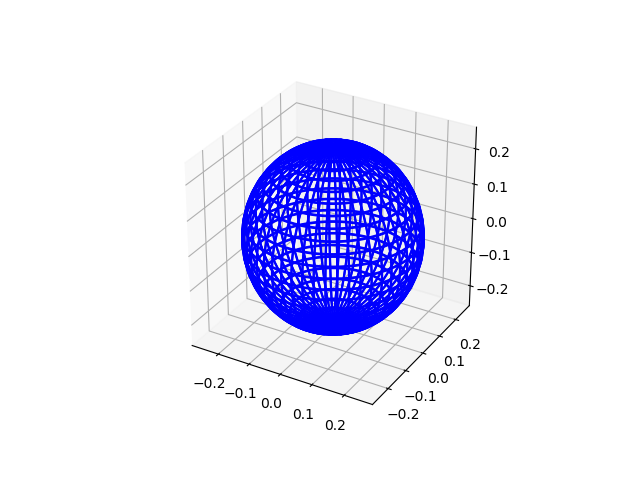

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")


# draw sphere
u, v = np.mgrid[0:2*np.pi:1000j, 0:2*np.pi:1000j]
x = np.cos(u)*np.sin(v)/4
y = np.sin(u)*np.sin(v)/4
z = np.cos(v)/4
ax.plot_wireframe(x, y, z, color="b")



In [2]:
from dataclasses import dataclass


# This is a sample Python script.

# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.
@dataclass()
class Point:
    x: float
    y: float
    z: float


@dataclass()
class Sphere(Point):
    R: float


def is_point_belongs_to_sphere(p: Point, s: Sphere):
    return (p.x - s.x) ** 2 + (p.y - s.y) ** 2 + (p.z - s.z) ** 2 - s.R**2

def sphere_intersect_checking(p1: Point, p2: Point, s: Sphere) -> bool:
    f1 = is_point_belongs_to_sphere(p1, s)
    f2 = is_point_belongs_to_sphere(p2, s)
    if p1 == p2:
        return False
    if f1 * f2 <= 0:
        return True
    if f1 + f2 < 0:
        return True
    if f1 + f2 > 0:
        xc = (p1.x + p2.x) / 2
        yc = (p1.y + p2.y) / 2
        zc = (p1.z + p2.z) / 2
        c = Point(xc, yc, zc)
        # print(f"Новая точка {c} left {p1} right {p2}")
        if (c == p1 or c == p2):
            return False
        if f1 > f2:
            return sphere_intersect_checking(c, p2, s)
        else:
            return sphere_intersect_checking(p1, c, s)
    return False


# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    p1 = Point(1, 1, 1)
    p2 = Point(10, 1, 1)
    s = Sphere(3, 55, 1, 3)
    result = sphere_intersect_checking(p1, p2, s)
    print(result)

# See PyCharm help at https://www.jetbrains.com/help/pycharm/


False
